## Problem Statement

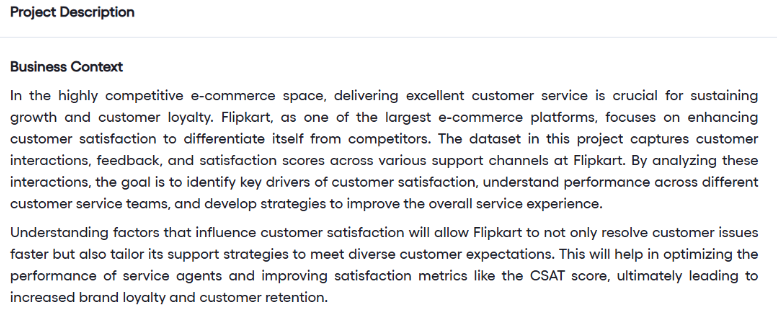

Goal:-


1.  Identify key drivers of customer satisfaction (simply important features)
2.  Understand performance across different customer service teams___ plot of supervisers and managers vs csat score

3.   Develop strategies to improve overall service experience____ using reviews






# Understanding the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ML_DATASETS/Customer_support_data.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
df.shape

(85907, 20)

In [ ]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

There are few unnecessary features here like unique_id, order_id, etc. which won't contribute to CSAT score; we will handle them later

In [ ]:
len(df.columns)

20

Lets understand the features in the dataset:






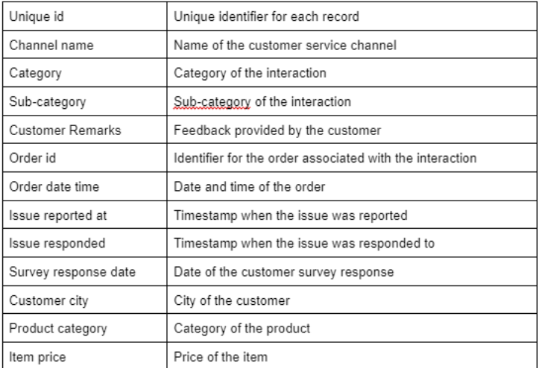

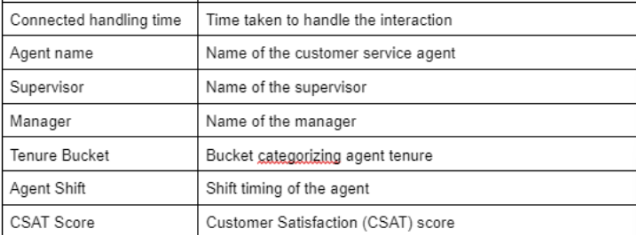

From the definition of aobve features, we can understand that unique id, order id, order date time; won't contribute to CSAT score, let's drop them later

# Univariate Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

We have only 242 values(around 99.7% missing) for connected_handling_time; let's drop it later.  We will look for missing value % for other features later

In [ ]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


CSAT score contains mostly 5, imbalanced dataset. Connecting_handling_time has too many missing values and item_prices also have missing values and looks left skewed.

In [ ]:
print(list(df['CSAT Score'][:100]))

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 4, 4, 5, 5, 5, 3, 5, 5, 5, 5, 4, 5, 5, 1, 5, 5, 4, 4, 5, 1, 1, 5, 4, 5, 5, 3, 5, 5, 5, 3, 5, 5, 5, 5, 5, 4, 5, 5, 4, 3, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5]


In [ ]:
# Percentage of missing values per column
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent.sort_values(ascending=False)

# Display as a DataFrame
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', '% Missing']
print(missing_df)


                     Column  % Missing
0   connected_handling_time  99.718300
1             Customer_City  80.119199
2          Product_category  79.983005
3                Item_price  79.971364
4           order_date_time  79.962052
5          Customer Remarks  66.542889
6                  Order_id  21.222950
7                 Unique id   0.000000
8              Sub-category   0.000000
9                  category   0.000000
10             channel_name   0.000000
11        Issue_reported at   0.000000
12          issue_responded   0.000000
13     Survey_response_Date   0.000000
14               Agent_name   0.000000
15               Supervisor   0.000000
16                  Manager   0.000000
17            Tenure Bucket   0.000000
18              Agent Shift   0.000000
19               CSAT Score   0.000000




*   We must drop connected_handling time(99.7% missing) and order_date_time
(~80% missing) and order_id(21.22% missing); since they have many missing values and also don't contribute to CSAT score

*   For customer city, product_category and Item price ; we will try to understand their contribution in CSAT score separately. But due to large % of missing values, it's not suitable for impute the missing values. We will handle these featurs and work on them separately later.

*   Customer review is an important feature, we will take special care of it.






In [ ]:
df.drop(['Unique id', 'Order_id',  'order_date_time','connected_handling_time','Customer_City', 'Product_category','Item_price'],  axis = 1, inplace = True)

We have removed Unique id here too since it has unique values for all the data points and won't contribute to CSAT score.

In [ ]:
len(df.columns)

13

Now we have 12 features for model training and last one is CSAT score.

In [ ]:
df.columns

Index(['channel_name', 'category', 'Sub-category', 'Customer Remarks',
       'Issue_reported at', 'issue_responded', 'Survey_response_Date',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
int(df.duplicated().sum())

9

In [ ]:
df[df.duplicated()]

,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
9242,Inbound,Order Related,Installation/demo,NaN,04/08/2023 09:54,04/08/2023 10:00,04-Aug-23,Kathryn Vasquez,Noah Patel,Michael Lee,>90,Morning,5
12002,Inbound,Returns,Reverse Pickup Enquiry,NaN,05/08/2023 09:15,05/08/2023 09:26,05-Aug-23,Anthony Booth,William Park,John Smith,31-60,Morning,5
16899,Inbound,Payments related,e-Gift Voucher,NaN,07/08/2023 22:05,07/08/2023 22:23,07-Aug-23,Lee Allen PhD,Elijah Yamaguchi,John Smith,>90,Evening,5
53253,Outcall,Payments related,Payment related Queries,NaN,20/08/2023 10:21,20/08/2023 10:26,20-Aug-23,Randy May,Emily Yamashita,William Kim,On Job Training,Evening,5
58444,Outcall,Shopzilla Related,Shopzila Premium Related,NaN,22/08/2023 21:14,22/08/2023 21:17,22-Aug-23,Rebecca Walker,Logan Lee,Emily Chen,61-90,Evening,5
61792,Email,Returns,Reverse Pickup Enquiry,NaN,23/08/2023 10:56,23/08/2023 10:57,23-Aug-23,Joe Chapman,Sophia Chen,Jennifer Nguyen,On Job Training,Evening,5
77516,Email,Order Related,Unable to track,NaN,28/08/2023 18:30,28/08/2023 00:00,28-Aug-23,Mrs. Jennifer Stone,Dylan Kim,Michael Lee,>90,Morning,1
79734,Email,Returns,Reverse Pickup Enquiry,NaN,28/08/2023 12:30,29/08/2023 10:18,29-Aug-23,Janet Shea,Emma Park,Olivia Tan,>90,Morning,4
85501,Email,Order Related,Delayed,NaN,30/08/2023 11:03,31/08/2023 21:59,31-Aug-23,Jose Pruitt,Zoe Yamamoto,William Kim,On Job Training,Morning,1


Since we only have 9 duplicates, lets just drop them

In [ ]:
print(f'Shape before dropping duplicates: {df.shape}')
df = df.drop_duplicates().reset_index(drop=True)
print(f'Shape after dropping duplicates: {df.shape}')

Shape before dropping duplicates: (85907, 13)
Shape after dropping duplicates: (85898, 13)


In [ ]:
df.nunique()

,0
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31
Agent_name,1371
Supervisor,40
Manager,6


In [ ]:
# get numerical and categorical features using code
num_features = [feature for feature in df.columns if df[feature].dtype != "O"]
cat_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print('There are {} numerical features : {}'.format(len(num_features),num_features))
print("There are {} categorical features : {}\n".format(len(cat_features),cat_features))
print('_____' * 25,"\n")

# creating a list of all type of unique values in categorical features

for i in cat_features:
  print(f'{df[i].nunique()} Unique categories in {i} are: {df[i].unique()}')
  print()

There are 1 numerical features : ['CSAT Score']
There are 12 categorical features : ['channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift']

_____________________________________________________________________________________________________________________________ 

3 Unique categories in channel_name are: ['Outcall' 'Inbound' 'Email']

12 Unique categories in category are: ['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related' 'Others' 'App/website']

57 Unique categories in Sub-category are: ['Life Insurance' 'Product Specific Information' 'Installation/demo'
 'Reverse Pickup Enquiry' 'Not Needed' 'Fraudulent User'
 'Exchange / Replacement' 'Missing' 'General Enquiry' 'Return request'
 'Delayed' 'Service Centres Related' 'Payme

**Creating a new feature**

In [ ]:
# Convert columns to datetime
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M')

# Calculate time difference in hours
df['Repond_time'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 3600

# Optional: round to 2 decimal places
df['Repond_time'] = df['Repond_time'].round(2)


New feature i.e. Resolve time by the difference of issue_responded and issue_reported_at

In [ ]:
df['Repond_time'].max()

95.97

Here the max repond time is ~96hrs i.e. 4 days which is looks pretty bad.

In [ ]:
df['Repond_time'].min()

-23.95

This is not possible, there might be inconsistency in the dataet. Let's find what is causing these values to be negative

In [ ]:
# Filter rows with negative Resolve_time
negative_resolve_df = df[df['Repond_time'] < 0][['issue_responded', 'Issue_reported at', 'Repond_time']]

# Show the
negative_resolve_df

,issue_responded,Issue_reported at,Repond_time
74166,2023-08-28,2023-08-28 16:07:00,-16.12
74167,2023-08-28,2023-08-28 16:56:00,-16.93
74168,2023-08-28,2023-08-28 20:14:00,-20.23
74169,2023-08-28,2023-08-28 14:37:00,-14.62
74170,2023-08-28,2023-08-28 23:26:00,-23.43
...,...,...,...
77559,2023-08-28,2023-08-28 13:25:00,-13.42
77560,2023-08-28,2023-08-28 18:09:00,-18.15
77561,2023-08-28,2023-08-28 22:20:00,-22.33
77562,2023-08-28,2023-08-28 14:38:00,-14.63


We have around 3k rows with -ve value, lets impute them with mean.

In [ ]:
# Step 1: Calculate mean of only valid (positive) respond times
mean_respond_time = df[df['Repond_time'] > 0]['Repond_time'].mean()

# Step 2: Replace negative values with this mean
df.loc[df['Repond_time'] < 0, 'Repond_time'] = mean_respond_time

# Optional: round it again if needed
df['Repond_time'] = df['Repond_time'].round(2)

# Check to confirm no more negative values
print(df['Repond_time'].min())


0.0


In [ ]:
print(len(df.columns))
df.drop(['issue_responded','Issue_reported at'],  axis = 1, inplace = True)
print(len(df.columns))


14
12


We had 13 columns previously, after adding "Repond_time" we got 14, after removing these 2 above colums we are left with 12 columns now i.e. 11 features and last is CSAT score.

In [ ]:
df.columns

Index(['channel_name', 'category', 'Sub-category', 'Customer Remarks',
       'Survey_response_Date', 'Agent_name', 'Supervisor', 'Manager',
       'Tenure Bucket', 'Agent Shift', 'CSAT Score', 'Repond_time'],
      dtype='object')

**CSAT Score**

<Axes: xlabel='CSAT Score', ylabel='Count'>

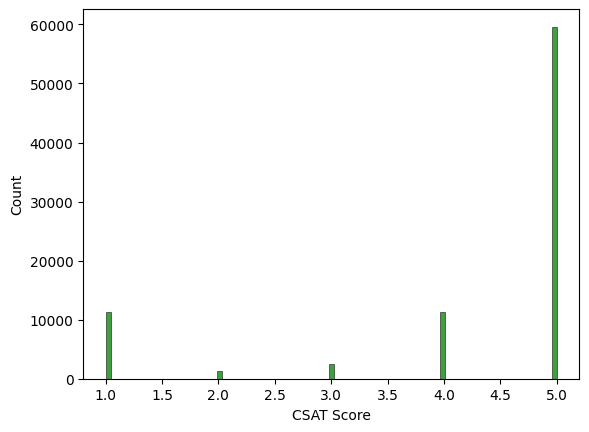

In [ ]:
import seaborn as sns
sns.histplot(data=df,x='CSAT Score',color='g')

We have ~60k rows with CSAT score as 5. This looks good as we have high customer satisfaction score, but dataset is imbalanced. It would be interesting to see, the customer reviews and is there any relation of missing, bad and good customer review with CSAT scores

**Visualizing each features separately**

**Repond_time**

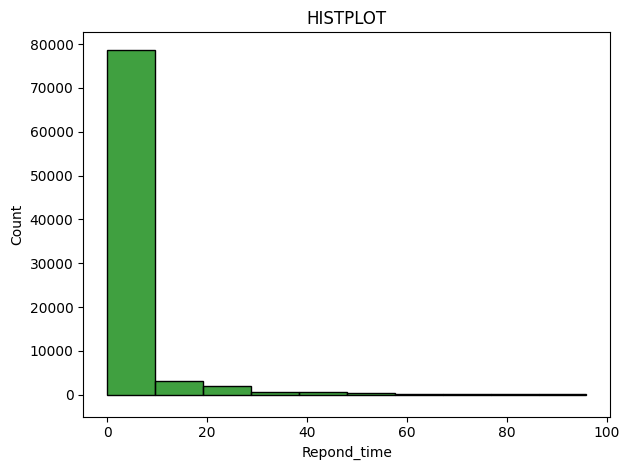

In [ ]:
sns.histplot(data=df,x='Repond_time',kde=False,bins=10,color='g')
plt.title("HISTPLOT")

# Expand the y-axis lower limit a bit (e.g., start from -5 to give space)
plt.ylim(-5000)  # You can change -5 to -2 or 0. This adds visual breathing room at the bottom

plt.tight_layout()
plt.show()

In [ ]:
count_over_48 = df[df['Repond_time'] > 48].shape[0]
print(f"Number of rows with Repond_time > 48 hours: {count_over_48}")

Number of rows with Repond_time > 48 hours: 999


Around 75k+ plus queries were responded within 10 hrs this looks but, we have ~1000 customers with 2 days+ repond time, which is a bad indicator.

**Survey_response_Date**

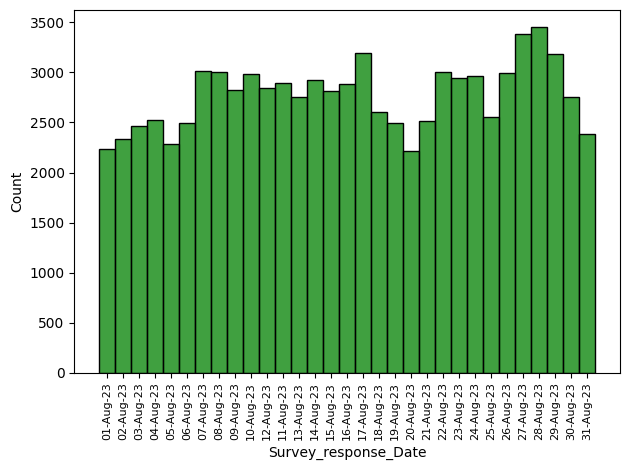

In [ ]:
import seaborn as sns
sns.histplot(data=df,x='Survey_response_Date',color='g')
plt.xticks(rotation=90, fontsize=8)  # Rotate and reduce label size
plt.tight_layout()
plt.show()

As we can understand that survey_reponse_date, won't be affecting the CSAT score and also it has little variation across the dates. We will be dropping this feature.

In [ ]:
print(len(df.columns))
df.drop(['Survey_response_Date'],  axis = 1, inplace = True)
print(len(df.columns))

12
11


Great now we have 10 input features and 1 CSAT column.

In [ ]:
df.columns

Index(['channel_name', 'category', 'Sub-category', 'Customer Remarks',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score', 'Repond_time'],
      dtype='object')

**channel_name**

<Axes: xlabel='channel_name', ylabel='Count'>

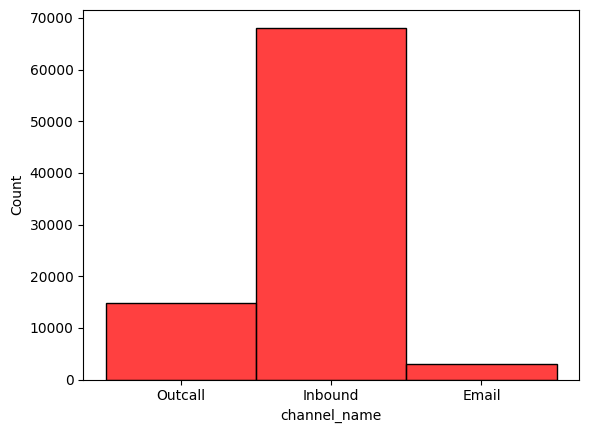

In [ ]:
# Histogram
import seaborn as sns
sns.histplot(data=df,x='channel_name',color='r')

Inbound is quite dominant here, with close to 70k datapoints. Outcall has around 10k datapoints but email were least used.

**category**

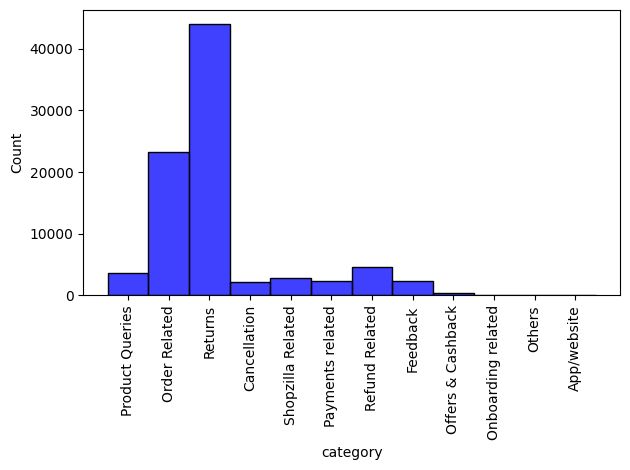

In [ ]:
sns.histplot(data=df, x='category', color='b')
plt.xticks(rotation=90)
plt.tight_layout()  # Optional: avoids label cutoff
plt.show()


Returns has 40k+ datapoints; order related wasa 20k+ while rest were less than 5k.

**Sub-category**

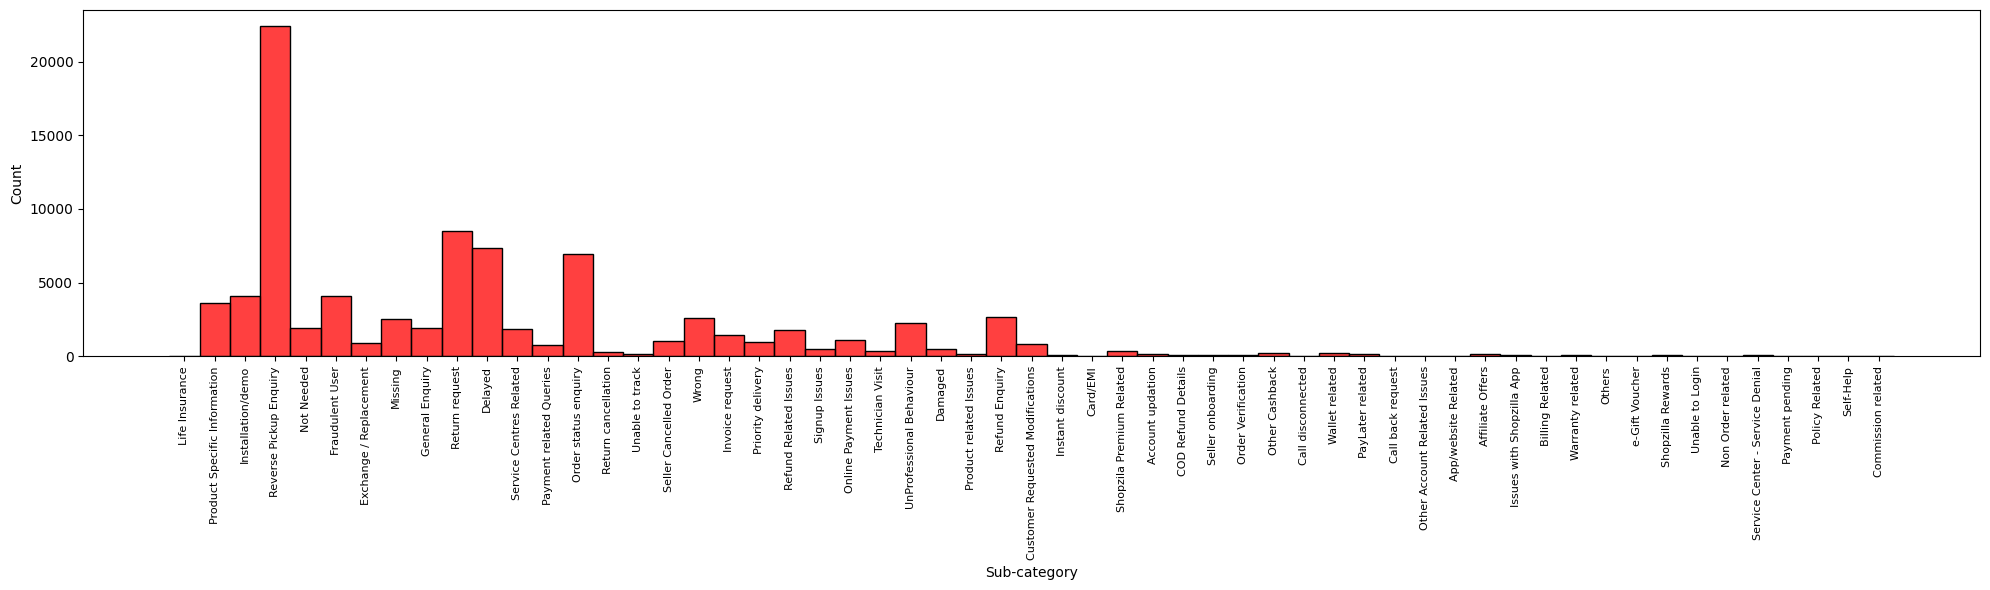

In [ ]:
plt.figure(figsize=(20, 6))  # Wider plot
sns.histplot(data=df, x='Sub-category', color='r')

plt.xticks(rotation=90, fontsize=8)  # Rotate and reduce label size
plt.tight_layout()
plt.show()


We have 20k+ reverse pickup enquiry. Around 5-10k data points for return request, delayed, order_status_enquiry. This problems are mainly due to communication gaps and which can handled by updating the user about their product time to time, and how we ensuring it is safely reached to them.

**Supervisor**

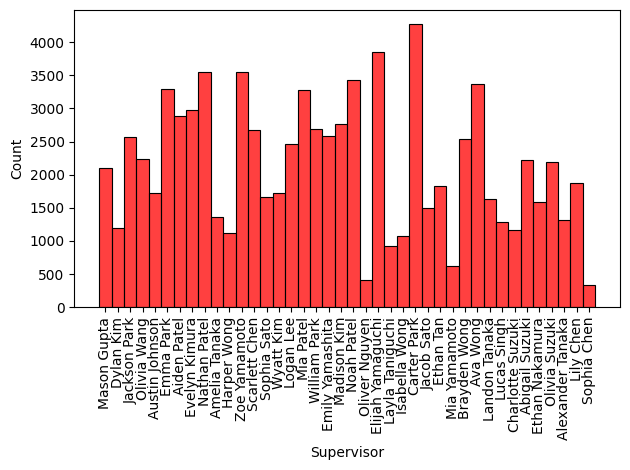

In [ ]:
sns.histplot(data=df, x='Supervisor', color='r')
plt.xticks(rotation=90)
plt.tight_layout()  # Optional: avoids label cutoff
plt.show()

There is a huge variation from 4k to 0.5k . We need to understand this, this could be useful for the strategy for user experience.

**Manager**

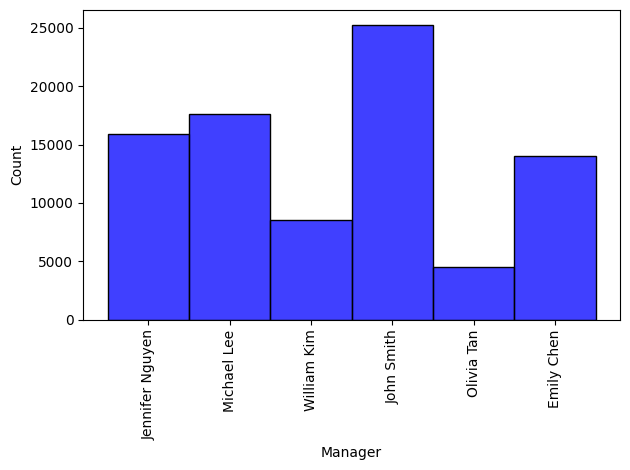

In [ ]:
sns.histplot(data=df, x='Manager', color='b')
plt.xticks(rotation=90)
plt.tight_layout()  # Optional: avoids label cutoff
plt.show()

There is a huge variation from 25k to 5k . We need to understand the reason behind this too.

**Tenure Bucket**

<Axes: xlabel='Tenure Bucket', ylabel='Count'>

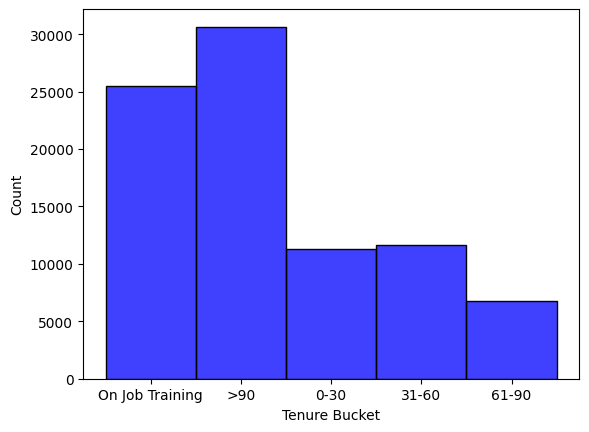

In [ ]:
sns.histplot(data=df,x='Tenure Bucket',color='b')

**Agent Shift**

<Axes: xlabel='Agent Shift', ylabel='Count'>

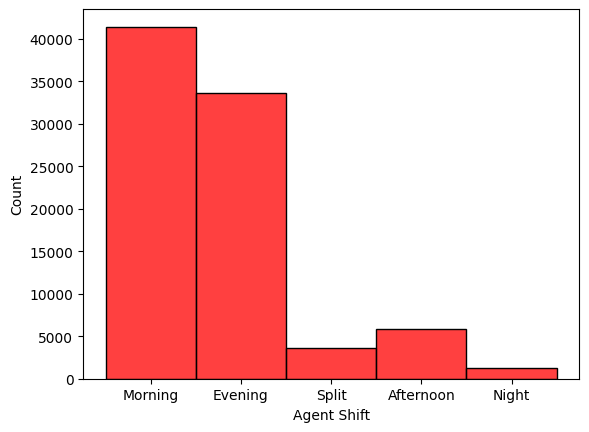

In [ ]:
sns.histplot(data=df,x='Agent Shift',color='r')

**Agent_name**

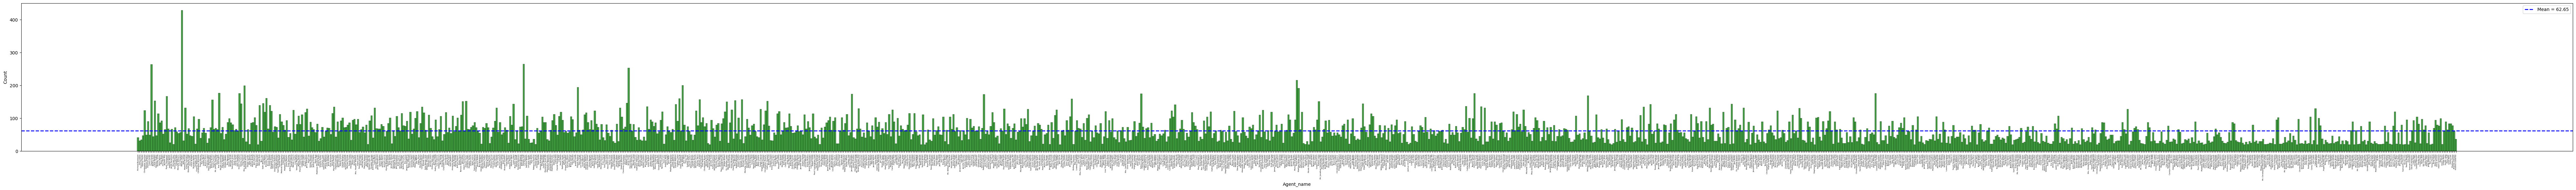

In [ ]:
plt.figure(figsize=(80, 6))  # Wider plot
ax = sns.histplot(data=df, x='Agent_name', color='g')

# Calculate mean count of agent occurrences
mean_count = df['Agent_name'].value_counts().mean()

# Draw horizontal blue line for mean
plt.axhline(mean_count, color='blue', linestyle='--', linewidth=2, label=f'Mean = {mean_count:.2f}')

plt.xticks(rotation=90, fontsize=4)  # Rotate and reduce label size
plt.tight_layout()
plt.legend()
plt.show()



# Bivariate Data Analysis

In [ ]:
custom_palette = {
    '1': '#e74c3c',   # Red
    '2': '#e67e22',   # Orange
    '3': '#f1c40f',   # Yellow
    '4': '#2ecc71',   # Green
    '5': '#3498db'    # Blue
}


In [ ]:
df.columns

Index(['channel_name', 'category', 'Sub-category', 'Customer Remarks',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score', 'Repond_time'],
      dtype='object')

**Repond_time vs CSAT Score**

<ipython-input-42-20e9a6695dcd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CSAT Score', y='Repond_time', data=avg_repond,palette=custom_palette)


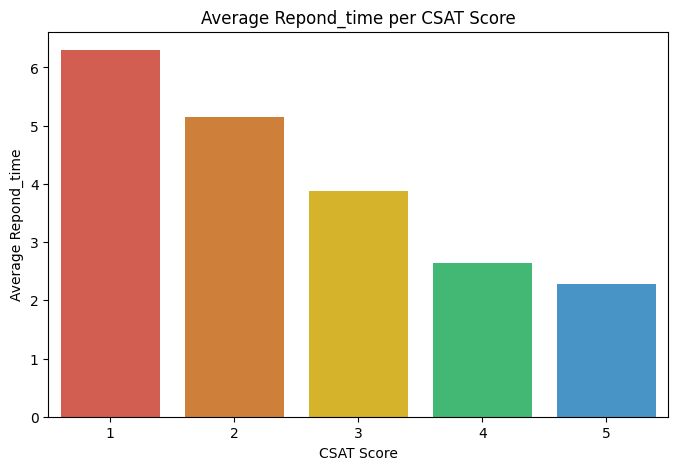

In [ ]:
plt.figure(figsize=(8, 5))
avg_repond = df.groupby('CSAT Score')['Repond_time'].mean().reset_index()
sns.barplot(x='CSAT Score', y='Repond_time', data=avg_repond,palette=custom_palette)
plt.title('Average Repond_time per CSAT Score')
plt.ylabel('Average Repond_time')
plt.show()


We can see avg Response time, varies inversely realted with CSAT score. Higher the Respond Time; lower the Customer Satisfaction(or CSAT score).

<ipython-input-41-d9af842c39c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CSAT Score', y='Repond_time', data=df, showfliers=False, palette=custom_palette)


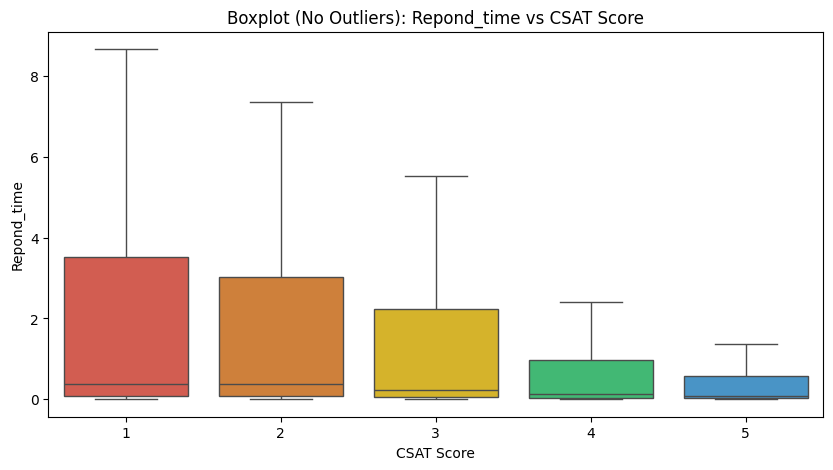

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='CSAT Score', y='Repond_time', data=df, showfliers=False, palette=custom_palette)
plt.title('Boxplot (No Outliers): Repond_time vs CSAT Score')
plt.show()

Here we also me a similar trend. Lower respond_time leads to higher CSAT score.

**channel_name vs CSAT Score**

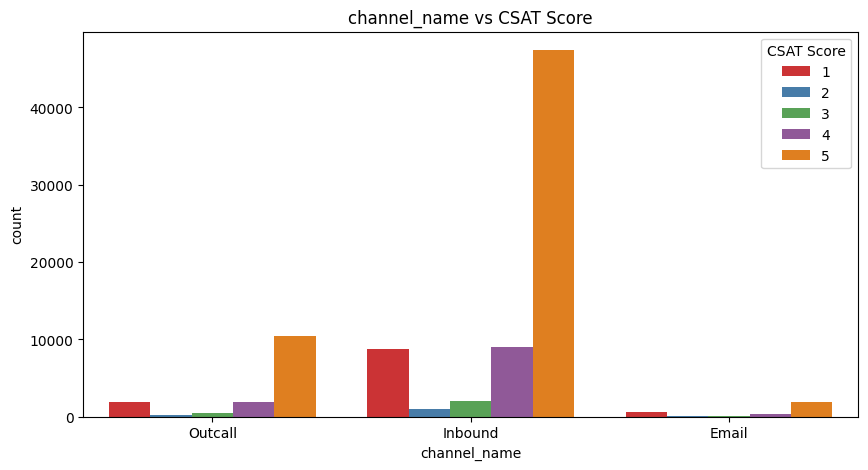

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='channel_name', hue='CSAT Score', data=df,palette='Set1')
plt.title('channel_name vs CSAT Score')
# plt.xticks(rotation=45)
plt.show()

**category vs CSAT Score**

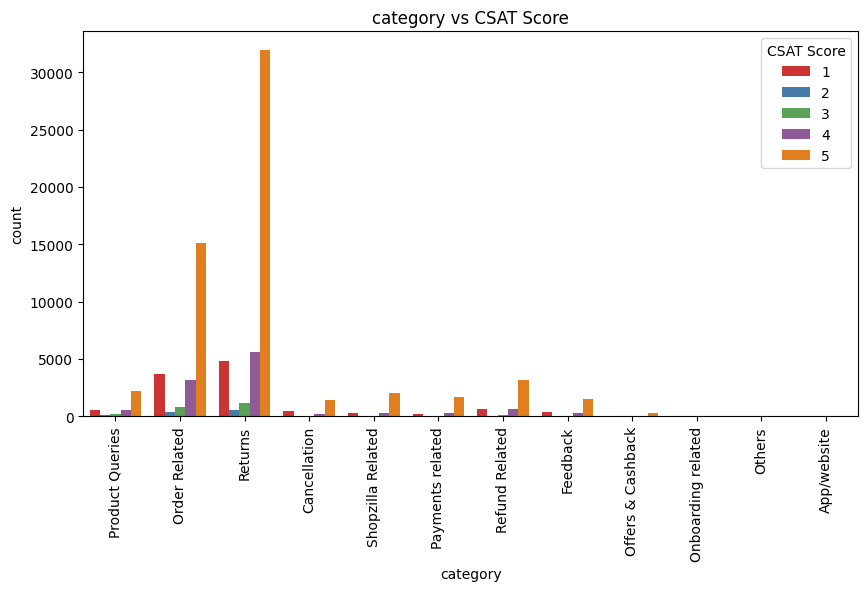

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='category', hue='CSAT Score', data=df ,palette='Set1')
plt.title('category vs CSAT Score')
plt.xticks(rotation=90)
plt.show()


**Sub-category vs CSAT Score**

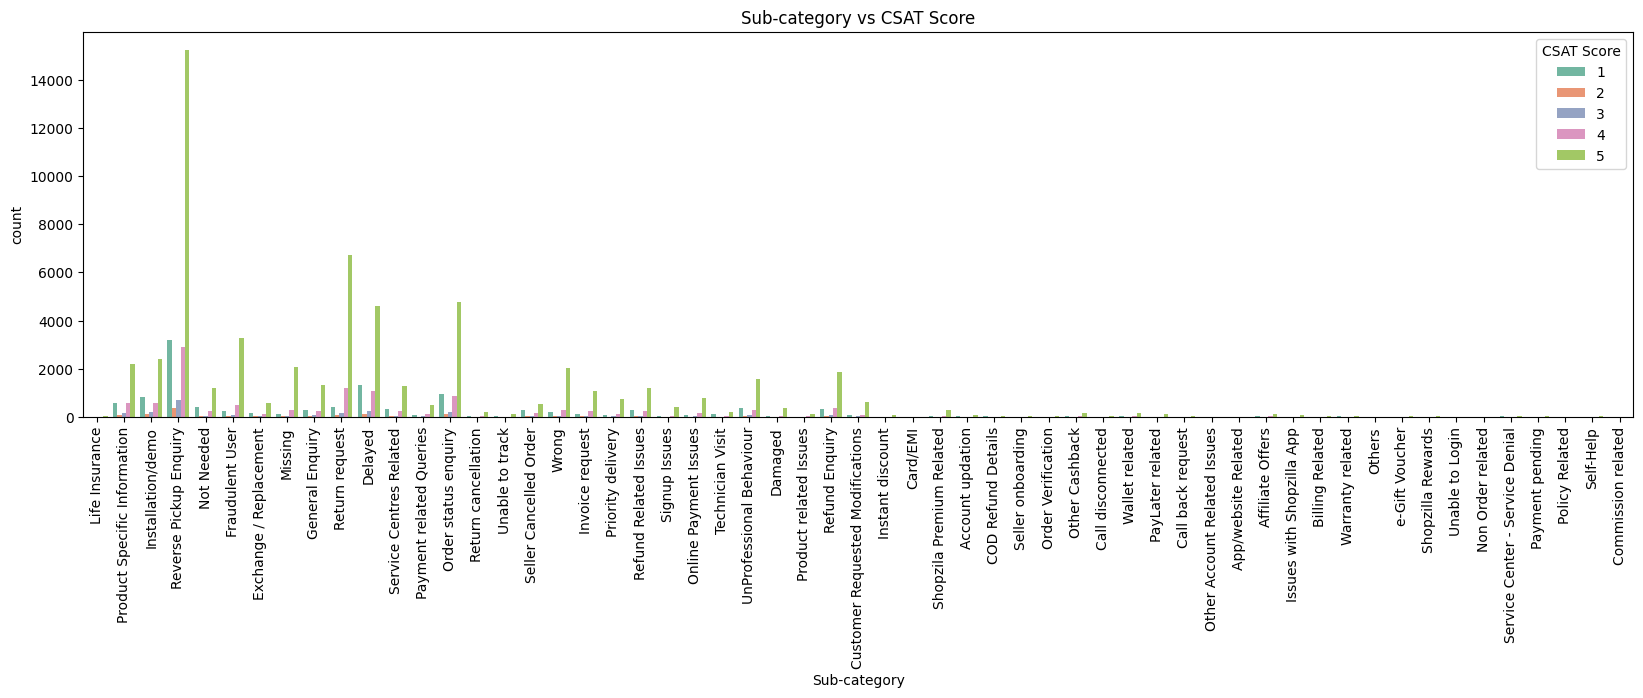

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x='Sub-category', hue='CSAT Score', data=df ,palette='Set2')
plt.title('Sub-category vs CSAT Score')
plt.xticks(rotation=90)
plt.show()


**Supervisor vs CSAT Score**

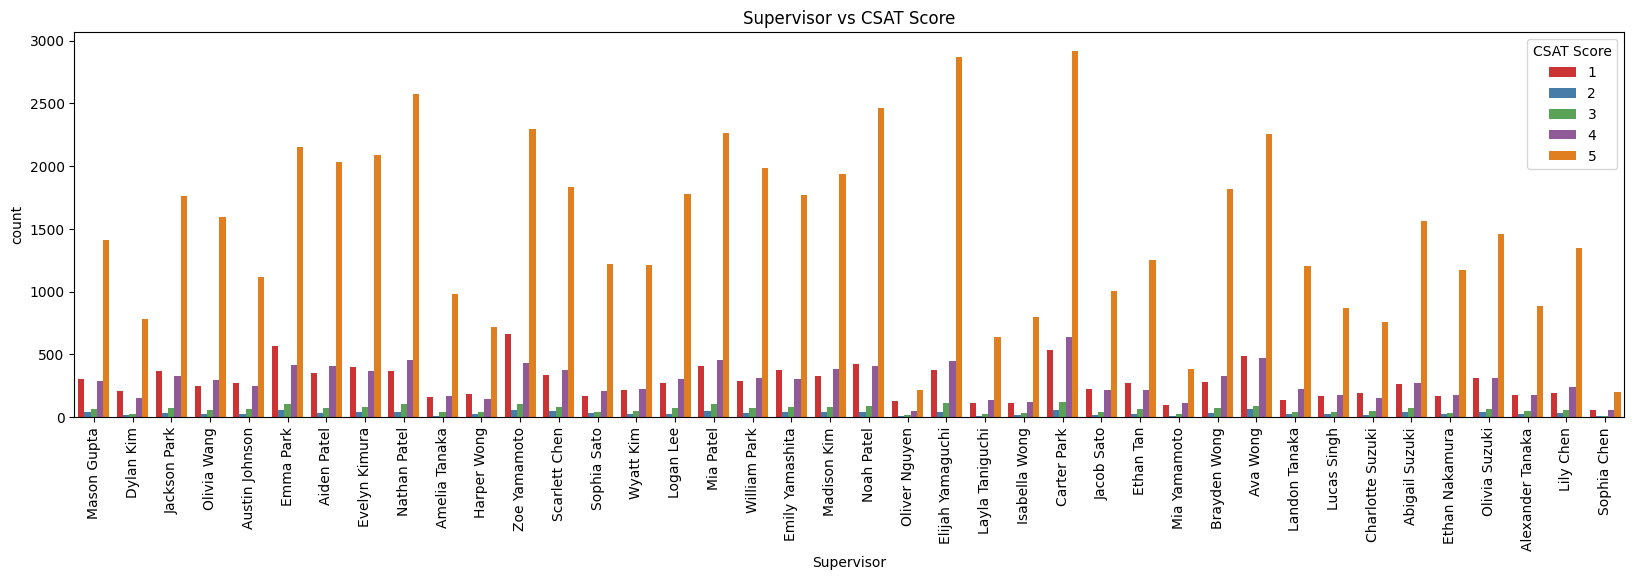

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x='Supervisor', hue='CSAT Score', data=df,palette='Set1')
plt.title('Supervisor vs CSAT Score')
plt.xticks(rotation=90)
plt.show()


**Manager vs CSAT Score**

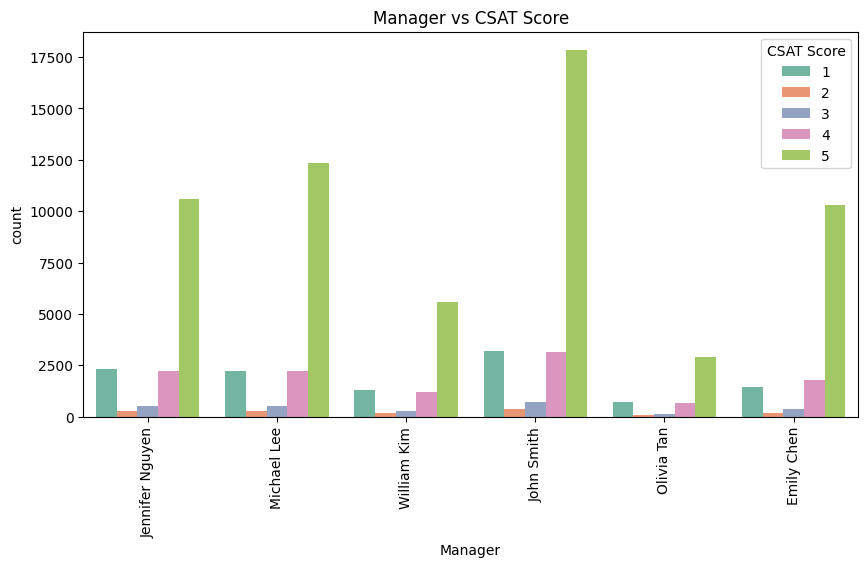

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Manager', hue='CSAT Score', data=df,palette='Set2')
plt.title('Manager vs CSAT Score')
plt.xticks(rotation=90)
plt.show()


**Tenure Bucket vs CSAT Score**

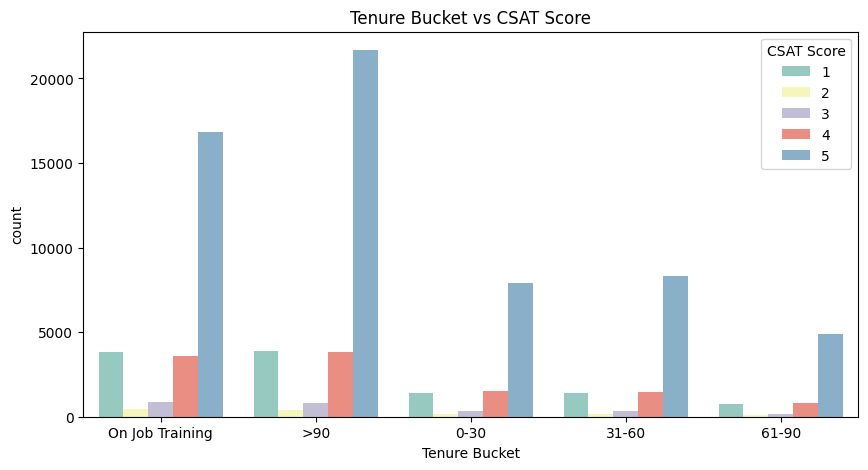

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Tenure Bucket', hue='CSAT Score', data=df,palette='Set3')
plt.title('Tenure Bucket vs CSAT Score')
# plt.xticks(rotation=45)
plt.show()

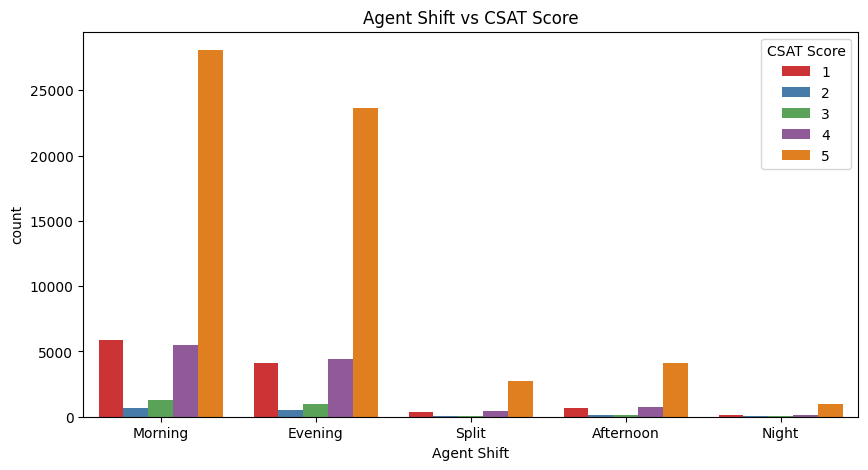

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Agent Shift', hue='CSAT Score', data=df,palette='Set1')
plt.title('Agent Shift vs CSAT Score')
# plt.xticks(rotation=45)
plt.show()

# Data Preprocessing

In [ ]:
df.head()

,channel_name,category,Sub-category,Customer Remarks,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Repond_time
0,Outcall,Product Queries,Life Insurance,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0.57
1,Outcall,Product Queries,Product Specific Information,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0.03
2,Inbound,Order Related,Installation/demo,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0.37
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0.33
4,Inbound,Cancellation,Not Needed,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0.03


Let's first move towards, preprocessing of customer remarks

In [ ]:
df['Customer Remarks'][:50]

,Customer Remarks
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,Very good
8,Shopzilla app and it's all coustomer care serv...
9,NaN


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Fill NaN with "missing"
df['Customer Remarks'] = df['Customer Remarks'].fillna('missing')

# Function to classify sentiment
def classify_sentiment(text):
    if text == 'missing':
        return 'missing'

    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
df['Sentiment'] = df['Customer Remarks'].apply(classify_sentiment)

# View counts of each sentiment category
print(df['Sentiment'].value_counts())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment
missing     57156
positive    18978
neutral      4994
negative     4770
Name: count, dtype: int64


Now let's see how our new feature is doing

In [ ]:
df[['Sentiment', 'Customer Remarks']][:100]

,Sentiment,Customer Remarks
0,missing,missing
1,missing,missing
2,missing,missing
3,missing,missing
4,missing,missing
...,...,...
95,positive,Please pack the products which actually custom...
96,missing,missing
97,missing,missing
98,positive,Thanks


In [ ]:
df_preprocessed = df.drop(['Customer Remarks'],  axis = 1,inplace= False)
df_preprocessed.to_csv('/content/drive/MyDrive/ML_DATASETS/processed_customer_data.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML_DATASETS/processed_customer_data.csv')
df.head()

,channel_name,category,Sub-category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Repond_time,Sentiment
0,Outcall,Product Queries,Life Insurance,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0.57,missing
1,Outcall,Product Queries,Product Specific Information,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0.03,missing
2,Inbound,Order Related,Installation/demo,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0.37,missing
3,Inbound,Returns,Reverse Pickup Enquiry,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0.33,missing
4,Inbound,Cancellation,Not Needed,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0.03,missing


In [ ]:
df.columns

Index(['channel_name', 'category', 'Sub-category', 'Agent_name', 'Supervisor',
       'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score', 'Repond_time',
       'Sentiment'],
      dtype='object')

In [ ]:
pd.set_option('display.max_rows', None)
df['Sentiment'][:100]

,Sentiment
0,missing
1,missing
2,missing
3,missing
4,missing
5,missing
6,missing
7,positive
8,positive
9,missing


Prepare X and y variable

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
X = df.drop(columns=['CSAT Score'],axis=1)

In [ ]:
feature_names = X.columns.tolist()

In [ ]:
y= df['CSAT Score']

In [ ]:
# Collecting features for transformation
X_num_features = [feature for feature in X.columns if X[feature].dtype != 'O']
X_cat_features = [feature for feature in X.columns if X[feature].dtype == 'O']

numeric_transformer = StandardScaler()
ordinal_encoder = OrdinalEncoder()  # Changed from OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('Ordinal Encoding', ordinal_encoder, X_cat_features),
        ('Standard Scaler', numeric_transformer, X_num_features)
    ]
)


In [ ]:
X= preprocessor.fit_transform(X)

In [ ]:
X[:10]

array([[ 2.00000000e+00,  8.00000000e+00,  1.90000000e+01,
         1.07200000e+03,  2.60000000e+01,  1.00000000e+00,
         4.00000000e+00,  2.00000000e+00,  0.00000000e+00,
        -2.56019447e-01],
       [ 2.00000000e+00,  8.00000000e+00,  3.40000000e+01,
         1.32300000e+03,  9.00000000e+00,  3.00000000e+00,
         3.00000000e+00,  2.00000000e+00,  0.00000000e+00,
        -3.14420769e-01],
       [ 1.00000000e+00,  5.00000000e+00,  1.50000000e+01,
         3.70000000e+02,  1.80000000e+01,  5.00000000e+00,
         4.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -2.77649566e-01],
       [ 1.00000000e+00,  1.00000000e+01,  4.00000000e+01,
         1.02400000e+03,  3.30000000e+01,  2.00000000e+00,
         3.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -2.81975590e-01],
       [ 1.00000000e+00,  1.00000000e+00,  2.20000000e+01,
         2.47000000e+02,  4.00000000e+00,  3.00000000e+00,
         0.00000000e+00,  2.00000000e+00,  0.00000000e+00,
        -3.

In [ ]:
X.shape

(85898, 10)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2, stratify=y)

In [ ]:
X_train.shape,X_test.shape

((68718, 10), (17180, 10))

# Model Training +  Testing and HyperParameter Tuning

logistic, random forest, xg forest....

In [ ]:
!pip install xgboost
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 2.0 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# 1. Logistic Regression
lr = lr = LogisticRegression(max_iter=2000, solver='lbfgs', multi_class='multinomial', class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr,zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("-" * 50)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression
              precision    recall  f1-score   support

           1       0.26      0.26      0.26      2246
           2       0.02      0.19      0.04       256
           3       0.04      0.08      0.05       512
           4       0.15      0.49      0.23      2244
           5       0.74      0.28      0.41     11922

    accuracy                           0.30     17180
   macro avg       0.24      0.26      0.20     17180
weighted avg       0.57      0.30      0.35     17180

Accuracy: 0.2991850989522701
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 1. Logistic Regression
lr = lr = LogisticRegression(max_iter=2000, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr,zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("-" * 50)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression
              precision    recall  f1-score   support

           1       0.39      0.02      0.04      2246
           2       0.00      0.00      0.00       256
           3       0.00      0.00      0.00       512
           4       0.00      0.00      0.00      2244
           5       0.70      1.00      0.82     11922

    accuracy                           0.69     17180
   macro avg       0.22      0.20      0.17     17180
weighted avg       0.53      0.69      0.57     17180

Accuracy: 0.6935972060535507
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train )
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print(classification_report(y_test, y_pred_rf,zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("-" * 50)

Random Forest
              precision    recall  f1-score   support

           1       0.46      0.27      0.34      2246
           2       0.02      0.00      0.01       256
           3       0.03      0.01      0.01       512
           4       0.15      0.04      0.07      2244
           5       0.72      0.91      0.80     11922

    accuracy                           0.67     17180
   macro avg       0.28      0.25      0.25     17180
weighted avg       0.58      0.67      0.61     17180

Accuracy: 0.6725844004656577
--------------------------------------------------


In [ ]:
# 3. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train-1)
y_pred_xgb = xgb.predict(X_test)+1
print("XGBoost")
print(classification_report(y_test, y_pred_xgb,zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("-" * 50)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:13:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost
              precision    recall  f1-score   support

           1       0.58      0.28      0.38      2246
           2       0.00      0.00      0.00       256
           3       0.00      0.00      0.00       512
           4       0.07      0.00      0.00      2244
           5       0.72      0.97      0.83     11922

    accuracy                           0.71     17180
   macro avg       0.28      0.25      0.24     17180
weighted avg       0.59      0.71      0.63     17180

Accuracy: 0.7130384167636787
--------------------------------------------------


In [ ]:
# 4. CatBoost (suppress verbose output)
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
print("CatBoost")
print(classification_report(y_test, y_pred_cat,zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("-" * 50)

CatBoost
              precision    recall  f1-score   support

           1       0.60      0.28      0.38      2246
           2       0.00      0.00      0.00       256
           3       0.00      0.00      0.00       512
           4       0.11      0.00      0.00      2244
           5       0.72      0.98      0.83     11922

    accuracy                           0.71     17180
   macro avg       0.29      0.25      0.24     17180
weighted avg       0.59      0.71      0.63     17180

Accuracy: 0.7148428405122235
--------------------------------------------------


Catboost achieves highes Accuracy so far. Even precision,recall and F1-score are better that XGBoost, our 2nd best model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


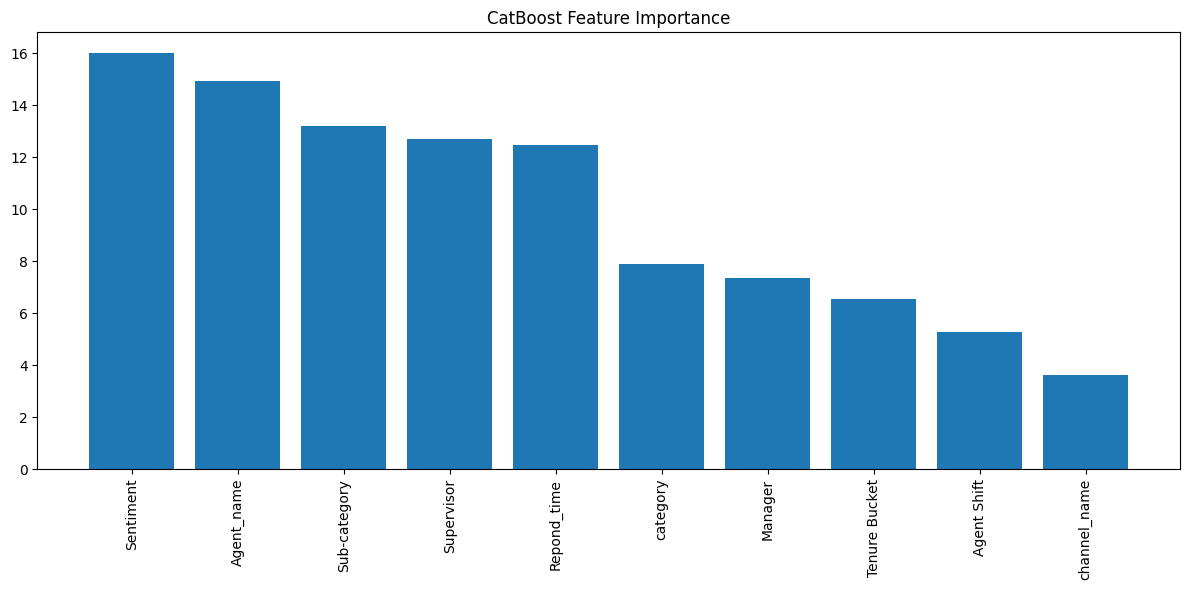

In [ ]:
cat_importances = cat.get_feature_importance()
indices_cat = np.argsort(cat_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("CatBoost Feature Importance")
plt.bar(range(len(cat_importances)), np.array(cat_importances)[indices_cat])
plt.xticks(range(len(cat_importances)), np.array(feature_names)[indices_cat], rotation=90)
plt.tight_layout()
plt.show()


5 features i.e.  Sentiment, Agent_name, Sub-category, Supervisor and Respond-time are most important. We have already anticipated Sentiment(from Customer Reviews), Sub-category and Respond-time in the list but Agent_name and Supervisors were unexpected.

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid you want to search over
param_grid = {
    'depth': [4, 6, 8],              # tree depth
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5],       # L2 regularization
    'border_count': [32, 50, 100]   # number of splits for numerical features
}

# Initialize CatBoostClassifier (silent to suppress output)
cat = CatBoostClassifier(verbose=0, random_seed=42)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=cat,
    param_grid=param_grid,
    cv=3,               # 3-fold cross-validation
    scoring='accuracy', # use accuracy to evaluate
    n_jobs=-1           # use all available cores
)

# Run the grid search
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Predict with best estimator
best_cat = grid_search.best_estimator_
y_pred_cat = best_cat.predict(X_test)

# Print evaluation
print("CatBoost after hyperparameter tuning")
print(classification_report(y_test, y_pred_cat, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("-" * 50)


Best parameters found: {'border_count': 100, 'depth': 4, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
CatBoost after hyperparameter tuning
              precision    recall  f1-score   support

           1       0.62      0.27      0.37      2246
           2       0.00      0.00      0.00       256
           3       0.00      0.00      0.00       512
           4       0.00      0.00      0.00      2244
           5       0.72      0.98      0.83     11922

    accuracy                           0.72     17180
   macro avg       0.27      0.25      0.24     17180
weighted avg       0.58      0.72      0.63     17180

Accuracy: 0.7150174621653085
--------------------------------------------------


Best hyperparameters for our CATBOOST model found were :


*   'border_count': 100
*   'depth': 4
*   'iterations': 300
*   'l2_leaf_reg': 5
*   'learning_rate': 0.1


# Solution to Goal 1

Identify key drivers of customer satisfaction (simply put; important features)

**Important Features:-**




1.   Sentiment: we got this after performing sentiment analysis on customer reviews(neutral, positive and negative) and one label for missing. This was expected since customer review are the true reflection of their experience.
2.   Respond time: this feature was created by using the differnce between Issue_reponded and Issue_reported_at. This was also expected since longer repond time leads to lower customer satisfaction as seen in visualisation of respond time vs CSAT score.
3.   Sub_category: We have already seen few sub_categories,encounterd most of the issues, if we can focus on those section; even though it might to make improvements their it will be worth it.
4.   Agent_name: Agents are the bridge between flipkart and customers. So they have the power to create the difference at the ground level.
5.   Supervisor: Good leader make a great team. When supervisor guide their team members i.e. agents well, there is a great improvement in customer experience.



# Solution to Goal 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To understand the work across various team we can first look for supervisor vs CSAT score and manager vs CSAT score

**Supervisor vs CSAT score**

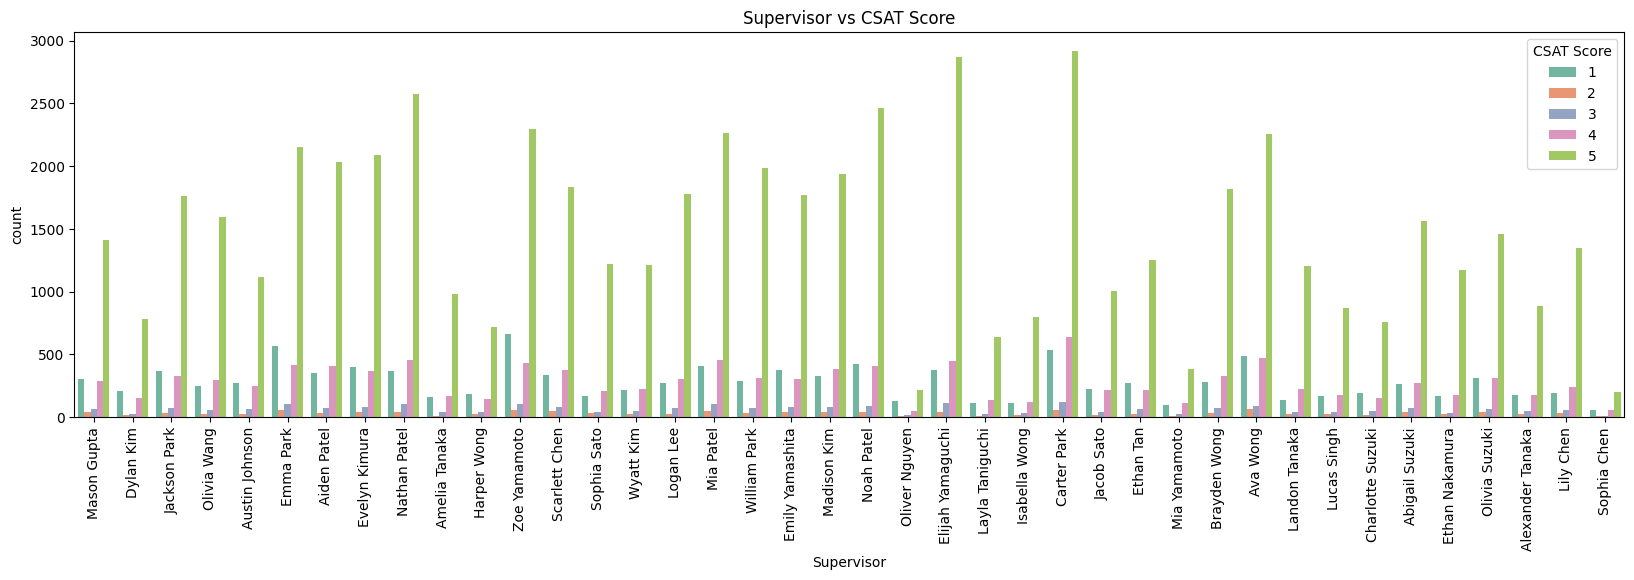

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x='Supervisor', hue='CSAT Score', data=df,palette='Set2')
plt.title('Supervisor vs CSAT Score')
plt.xticks(rotation=90)
plt.show()

Countplot is not enough to get a clear picture, lets look for percentage CSAT score for each Supervisor

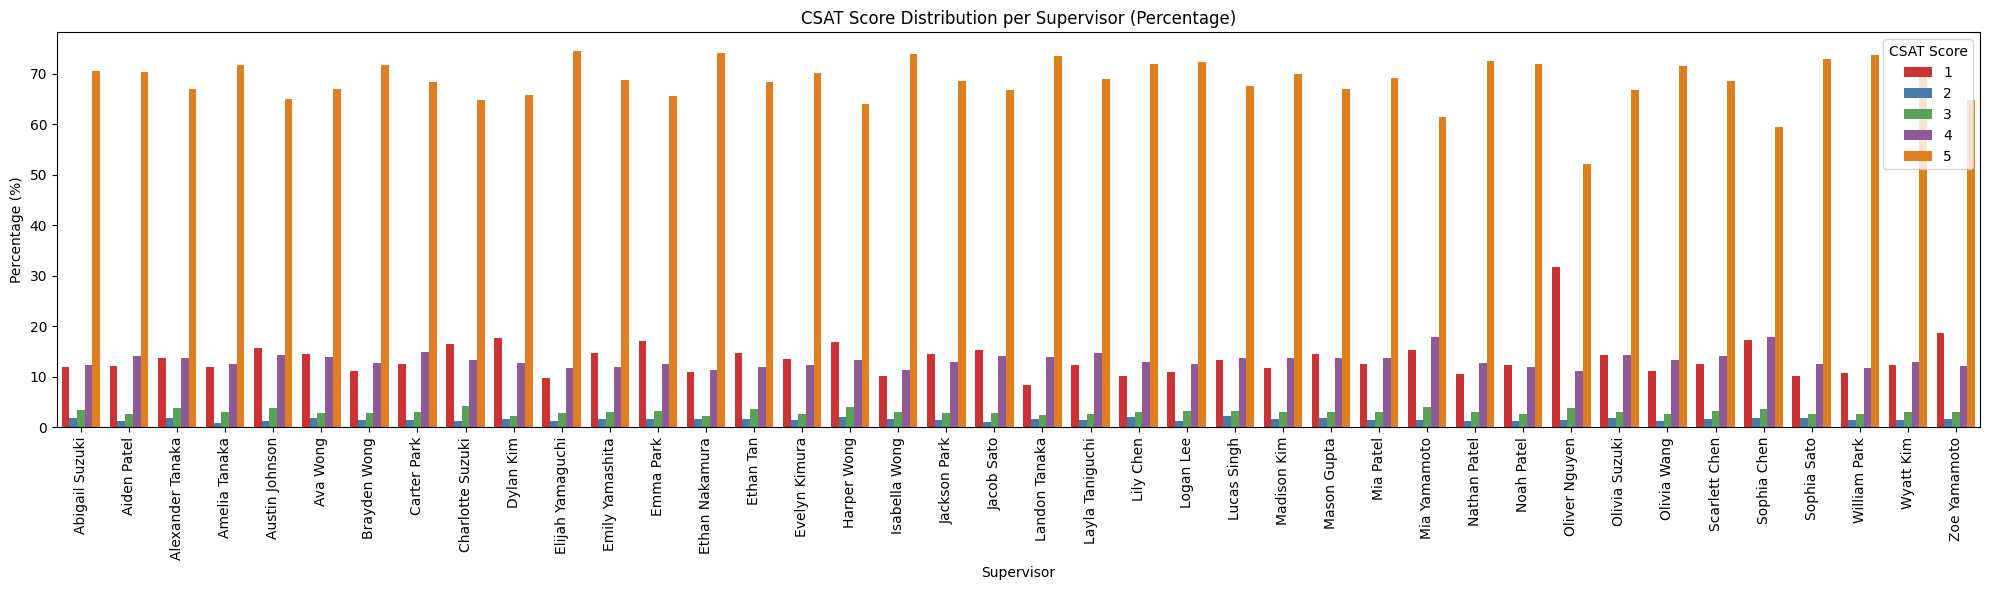

In [ ]:
# Step 1: Create a crosstab of Supervisor vs CSAT Score
crosstab = pd.crosstab(df['Supervisor'], df['CSAT Score'])

# Step 2: Convert counts to percentages row-wise (per Supervisor)
crosstab_percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Step 3: Melt the dataframe for Seaborn
df_melted = crosstab_percent.reset_index().melt(id_vars='Supervisor', var_name='CSAT Score', value_name='Percentage')

# Step 4: Plot as grouped bar chart
plt.figure(figsize=(20, 6))
sns.barplot(x='Supervisor', y='Percentage', hue='CSAT Score', data=df_melted, palette='Set1')
plt.title('CSAT Score Distribution per Supervisor (Percentage)')
plt.xticks(rotation=90)
plt.ylabel('Percentage (%)')
plt.legend(title='CSAT Score')
plt.tight_layout()
plt.show()


Let's group 1,2,3 as low score and 4-5 as single score

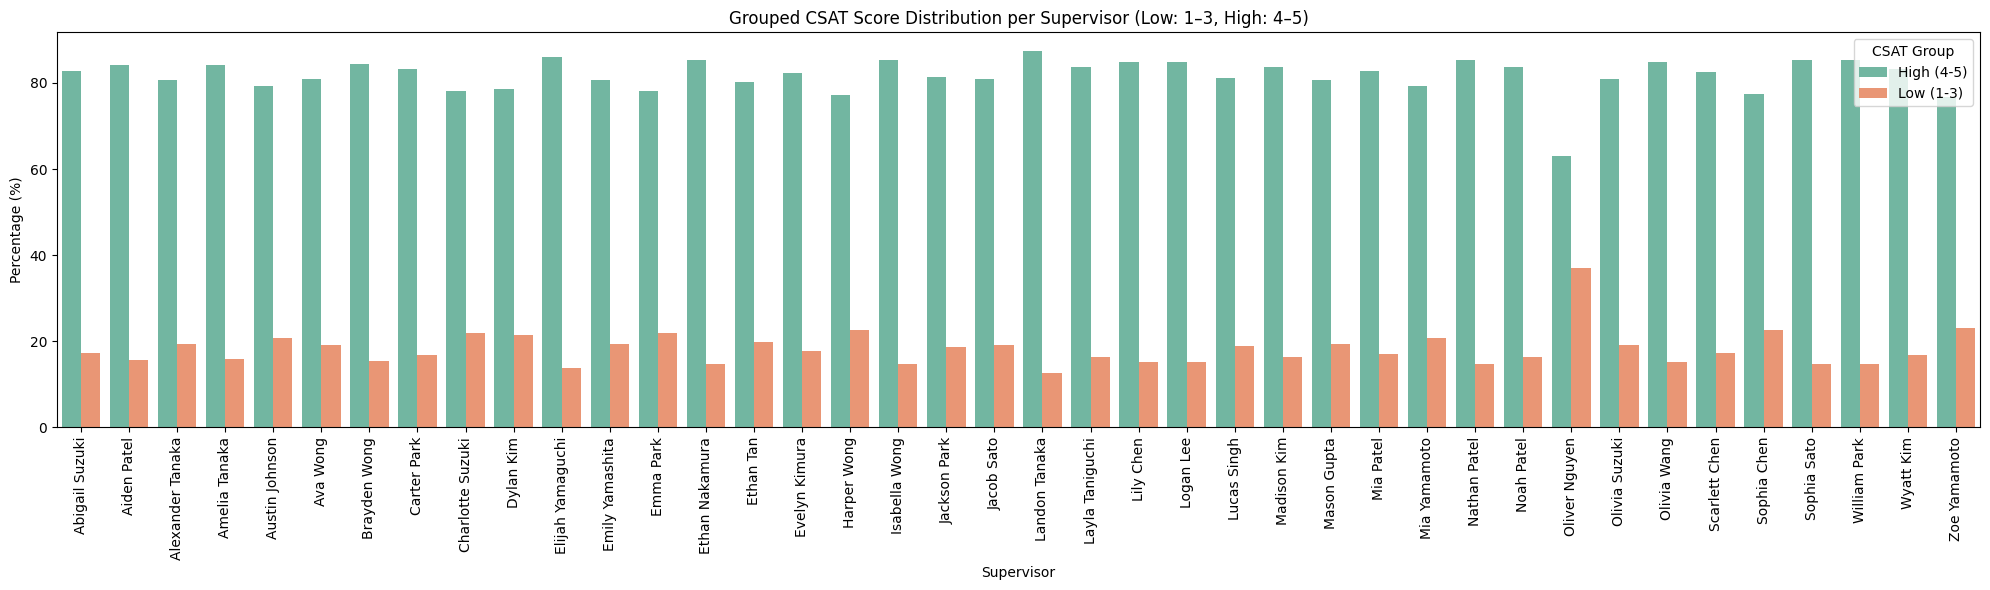

In [ ]:
# Step 1: Create a copy of the DataFrame and map scores into 2 categories
df_two_group = df.copy()
df_two_group['CSAT Group'] = df_two_group['CSAT Score'].map(lambda x: 'Low (1-3)' if x in [1, 2, 3] else 'High (4-5)')

# Step 2: Crosstab for Supervisor vs CSAT Group
crosstab_grouped = pd.crosstab(df_two_group['Supervisor'], df_two_group['CSAT Group'])

# Step 3: Convert to percentage
crosstab_grouped_percent = crosstab_grouped.div(crosstab_grouped.sum(axis=1), axis=0) * 100

# Step 4: Melt for seaborn
df_grouped_melted = crosstab_grouped_percent.reset_index().melt(id_vars='Supervisor',
                                                                var_name='CSAT Group',
                                                                value_name='Percentage')

# Step 5: Plot
plt.figure(figsize=(20, 6))
sns.barplot(x='Supervisor', y='Percentage', hue='CSAT Group', data=df_grouped_melted, palette='Set2')
plt.title('Grouped CSAT Score Distribution per Supervisor (Low: 1–3, High: 4–5)')
plt.xticks(rotation=90)
plt.ylabel('Percentage (%)')
plt.legend(title='CSAT Group')
plt.tight_layout()
plt.show()


Overall perform of supervisor is the same, now lets look at manager level.

**Manager vs CSAT score**

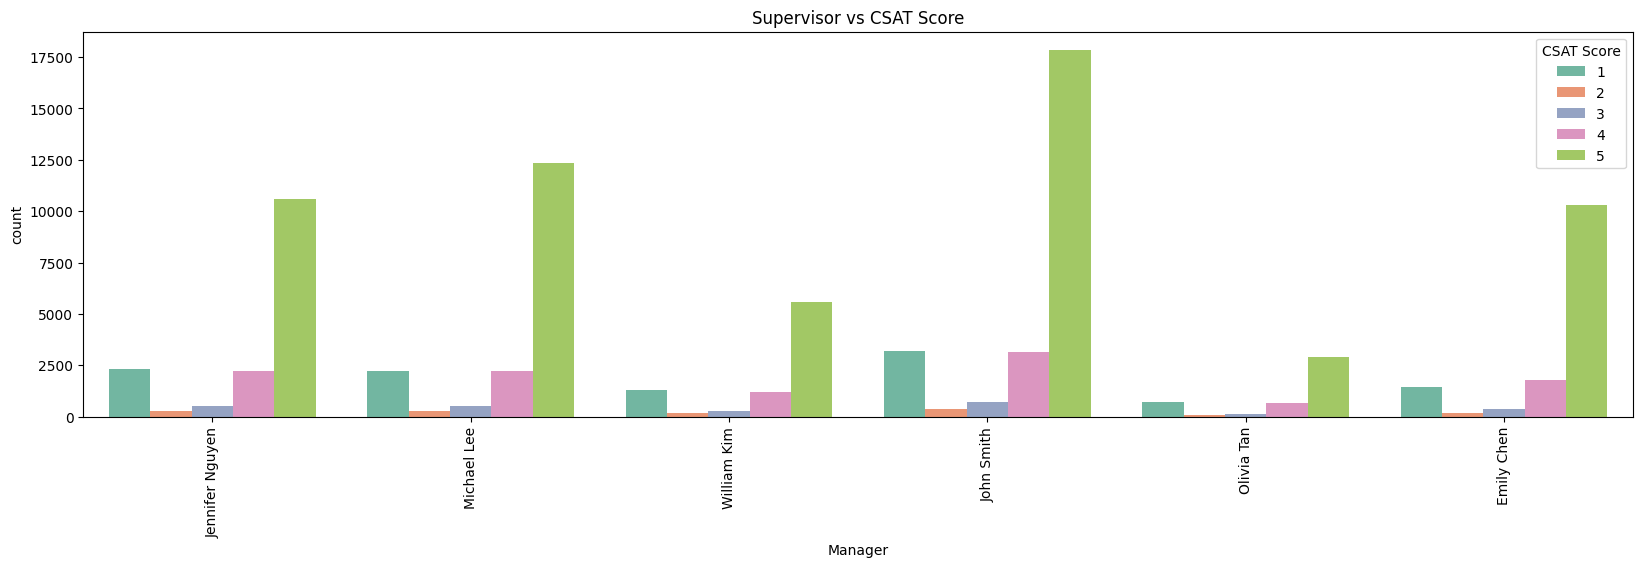

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x='Manager', hue='CSAT Score', data=df,palette='Set2')
plt.title('Supervisor vs CSAT Score')
plt.xticks(rotation=90)
plt.show()

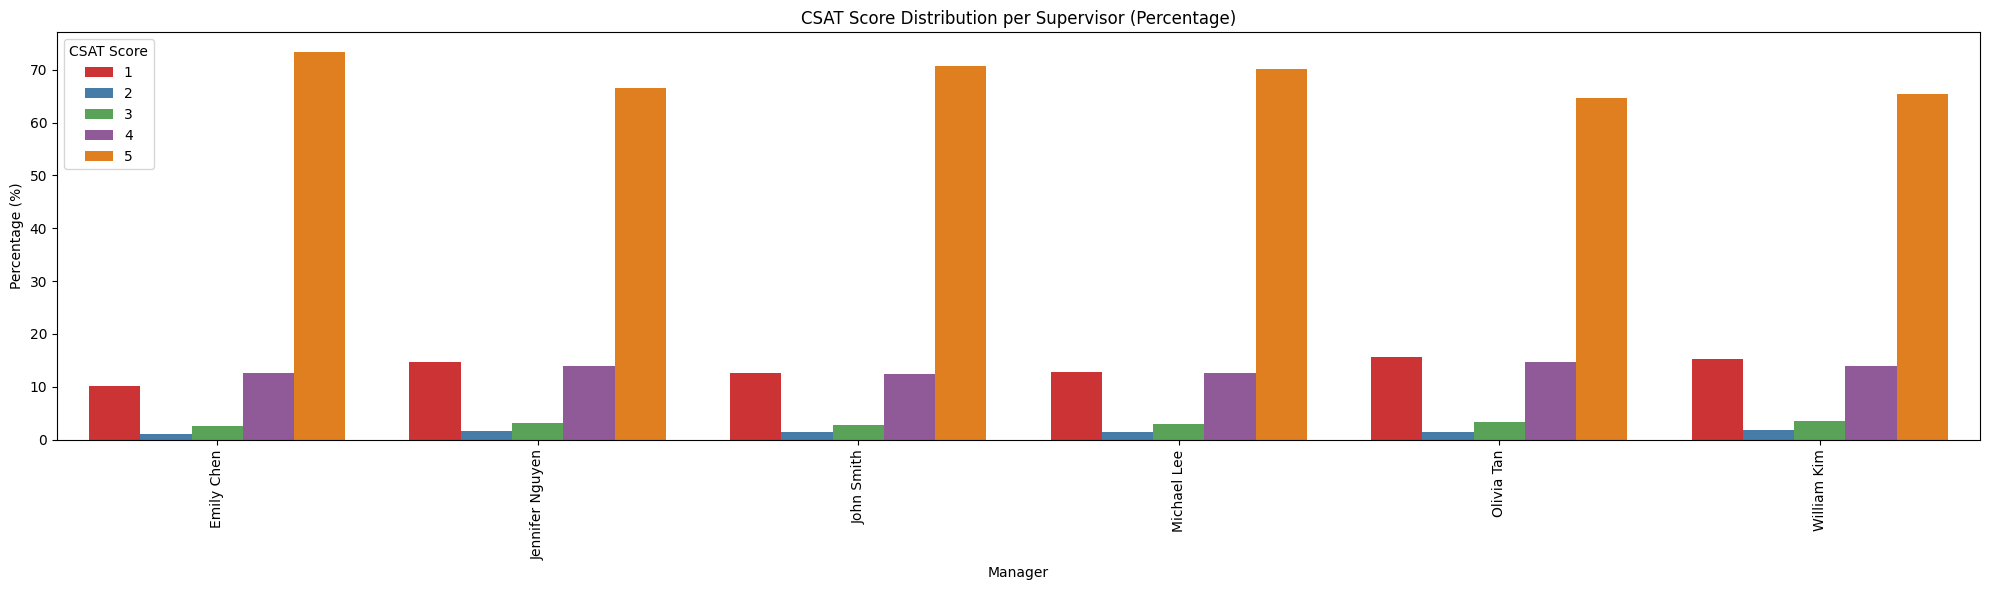

In [ ]:
# Step 1: Create a crosstab of Supervisor vs CSAT Score
crosstab = pd.crosstab(df['Manager'], df['CSAT Score'])

# Step 2: Convert counts to percentages row-wise (per Supervisor)
crosstab_percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Step 3: Melt the dataframe for Seaborn
df_melted = crosstab_percent.reset_index().melt(id_vars='Manager', var_name='CSAT Score', value_name='Percentage')

# Step 4: Plot as grouped bar chart
plt.figure(figsize=(20, 6))
sns.barplot(x='Manager', y='Percentage', hue='CSAT Score', data=df_melted, palette='Set1')
plt.title('CSAT Score Distribution per Supervisor (Percentage)')
plt.xticks(rotation=90)
plt.ylabel('Percentage (%)')
plt.legend(title='CSAT Score')
plt.tight_layout()
plt.show()

Let's group 1,2,3 as low score and 4-5 as single score

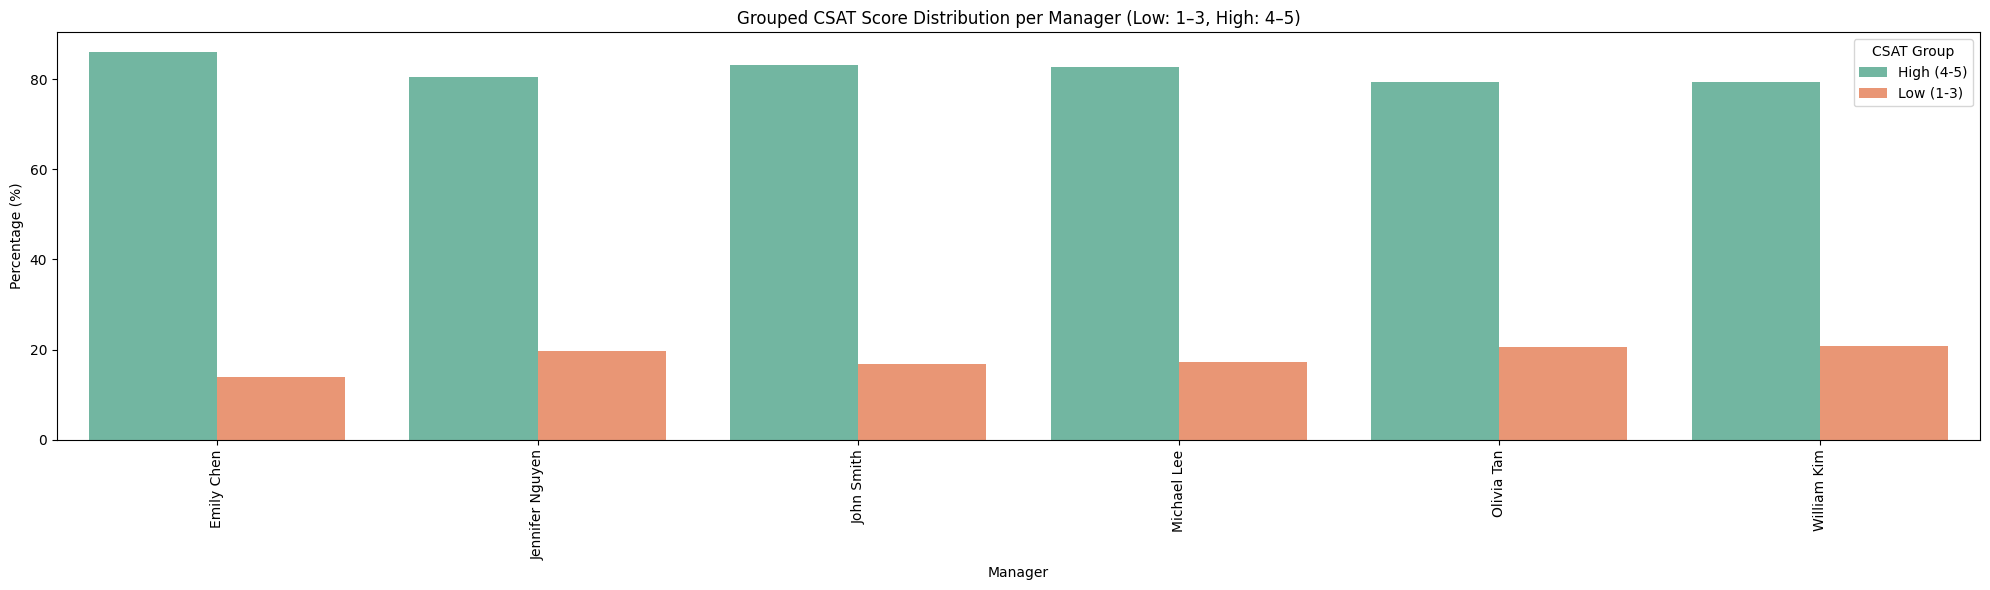

In [ ]:
# Step 1: Create a copy of the DataFrame and map scores into 2 categories
df_two_group = df.copy()
df_two_group['CSAT Group'] = df_two_group['CSAT Score'].map(lambda x: 'Low (1-3)' if x in [1, 2, 3] else 'High (4-5)')

# Step 2: Crosstab for Supervisor vs CSAT Group
crosstab_grouped = pd.crosstab(df_two_group['Manager'], df_two_group['CSAT Group'])

# Step 3: Convert to percentage
crosstab_grouped_percent = crosstab_grouped.div(crosstab_grouped.sum(axis=1), axis=0) * 100

# Step 4: Melt for seaborn
df_grouped_melted = crosstab_grouped_percent.reset_index().melt(id_vars='Manager',
                                                                var_name='CSAT Group',
                                                                value_name='Percentage')

# Step 5: Plot
plt.figure(figsize=(20, 6))
sns.barplot(x='Manager', y='Percentage', hue='CSAT Group', data=df_grouped_melted, palette='Set2')
plt.title('Grouped CSAT Score Distribution per Manager (Low: 1–3, High: 4–5)')
plt.xticks(rotation=90)
plt.ylabel('Percentage (%)')
plt.legend(title='CSAT Group')
plt.tight_layout()
plt.show()


For a single month i.e. Aug'23 there was not significant difference between the performance of supervisors and managers. But we can always get the best and worst, and proceed if required. This may due to lake of enough data, if we look a year or two, we might expect some significant differences.

# Solution to Goal 3

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ML_DATASETS/Customer_support_data.csv")
df.head()


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [4]:
# Show full column width (no trimming)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

df['Customer Remarks'][90:200]

,Customer Remarks
90,NaN
91,NaN
92,NaN
93,NaN
94,NaN
95,"Please pack the products which actually customers ordered, otherwise it is time to both you and us Shopzilla."
96,NaN
97,NaN
98,Thanks
99,NaN


Lets save customer review as we will we using it much often

In [ ]:
# Drop null values first
remarks = df['Customer Remarks'].dropna().reset_index(drop=True)

# Split into two halves
mid_index = len(remarks) // 2
remarks_part1 = remarks[:mid_index]
remarks_part2 = remarks[mid_index:]

# Save to two separate .txt files
remarks_part1.to_csv('/content/drive/MyDrive/ML_DATASETS/customer_remarks_part1.txt', index=False, header=False)
remarks_part2.to_csv('/content/drive/MyDrive/ML_DATASETS/customer_remarks_part2.txt', index=False, header=False)

In [ ]:
import spacy

# Load English model
nlp = spacy.load('en_core_web_sm')

# Read the saved file
with open('/content/drive/MyDrive/ML_DATASETS/customer_remarks_part1.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Process with spaCy
doc = nlp(text)

# Example: Print first 20 tokens
for token in list(doc)[:500]:
    print(token.text, token.pos_, token.lemma_)

Very ADV very
good ADJ good

 SPACE 

Shopzilla PROPN Shopzilla
app NOUN app
and CCONJ and
it PRON it
's AUX be
all PRON all
coustomer NOUN coustomer
care NOUN care
services NOUN service
is AUX be
very ADV very
good ADJ good
service NOUN service
provided VERB provide
all DET all
time NOUN time

 SPACE 

Very ADV very
bad ADJ bad

 SPACE 

Something PRON something

 SPACE 

All ADV all
good ADJ good

 SPACE 

Good ADJ good

 SPACE 

Godd PROPN Godd
job NOUN job

 SPACE 

Issue NOUN issue
not PART not
resolved VERB resolve
pathetic ADJ pathetic
service NOUN service

 SPACE 

Excellent PROPN Excellent

 SPACE 

Very ADV very
good ADJ good

 SPACE 

Give VERB give
proper ADJ proper
guidance NOUN guidance
to ADP to
the DET the
customer NOUN customer

 SPACE 

Please INTJ please
highlight VERB highlight
if SCONJ if
the DET the
products NOUN product
can AUX can
not PART not
be AUX be
returned VERB return
. PUNCT .

 SPACE 

3000 NUM 3000
rupees VERB rupee
loss NOUN loss

 SPACE 

Please INTJ 

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the reviews
with open('/content/drive/MyDrive/ML_DATASETS/customer_remarks_part1.txt', 'r', encoding='utf-8') as file:
    reviews = file.readlines()

# Basic preprocessing
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

# Cleaned reviews
cleaned_reviews = [preprocess(review) for review in reviews]

# Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_df=0.85, min_df=5, max_features=5000)
X = vectorizer.fit_transform(cleaned_reviews)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Score each review by sum of TF-IDF weights
review_scores = X.sum(axis=1).A1  # Convert sparse matrix row sums to 1D array

# Attach scores to original reviews
scored_reviews = pd.DataFrame({
    'review': reviews,
    'score': review_scores
})

# Sort and get top N most "important" reviews
top_reviews = scored_reviews.sort_values(by='score', ascending=False).head(20)
print("✅ Top 20 Most Informative Reviews:\n")

for i, review in enumerate(top_reviews['review'], 1):
    print(f"Review #{i}:")
    print(review)
    print("-" * 80)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Top 20 Most Informative Reviews:

Review #1:
"I am writing this feedback with immense frustration and disappointment over the abysmal customer service experience I encountered while dealing with one of your agents. It is truly disheartening to see a company of your stature fail so miserably in resolving simple customer issues and providing basic information.Let me begin by stating that I had a rather straightforward inquiry regarding a recent purchase, but dealing with your agent has been nothing short of a nightmare. The agent I interacted with displayed a complete lack of knowledge and understanding of the issue at hand. It seemed as if they were either inadequately trained or simply uninterested in assisting me.Not only was the agent unable to provide any useful information, but their attitude was also dismissive and unprofessional. They showed no empathy towards my concerns and treated my problem as insignificant, which is deeply distressing as a loyal customer of Shopzilla.It is

In [ ]:
import numpy as np

# Get mean TF-IDF score for each word
mean_scores = X.mean(axis=0).A1
top_terms_idx = np.argsort(mean_scores)[::-1][:30]
top_terms = [(feature_names[i], mean_scores[i]) for i in top_terms_idx]

print("\n🔤 Top 30 Informative Terms (TF-IDF):")
for term, score in top_terms:
    print(f"{term}: {score:.4f}")



🔤 Top 30 Informative Terms (TF-IDF):
good: 0.1871
nice: 0.0444
service: 0.0356
thanks: 0.0342
customer: 0.0327
thank: 0.0322
shopzilla: 0.0261
support: 0.0218
happy: 0.0185
problem: 0.0164
product: 0.0164
issue: 0.0156
bad: 0.0156
executive: 0.0147
excellent: 0.0143
care: 0.0142
delivery: 0.0138
please: 0.0138
time: 0.0123
experience: 0.0121
solve: 0.0099
return: 0.0096
call: 0.0094
best: 0.0094
order: 0.0090
help: 0.0090
person: 0.0089
resolved: 0.0084
much: 0.0084
resolve: 0.0081


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the reviews
with open('/content/drive/MyDrive/ML_DATASETS/customer_remarks_part2.txt', 'r', encoding='utf-8') as file:
    reviews = file.readlines()

# Basic preprocessing
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

# Cleaned reviews
cleaned_reviews = [preprocess(review) for review in reviews]

# Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_df=0.85, min_df=5, max_features=5000)
X = vectorizer.fit_transform(cleaned_reviews)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Score each review by sum of TF-IDF weights
review_scores = X.sum(axis=1).A1  # Convert sparse matrix row sums to 1D array

# Attach scores to original reviews
scored_reviews = pd.DataFrame({
    'review': reviews,
    'score': review_scores
})

# Sort and get top N most "important" reviews
top_reviews = scored_reviews.sort_values(by='score', ascending=False).head(20)
print("✅ Top 20 Most Informative Reviews:\n")

for i, review in enumerate(top_reviews['review'], 1):
    print(f"Review #{i}:")
    print(review)
    print("-" * 80)


✅ Top 20 Most Informative Reviews:

Review #1:
"Shopzilla's customer care service is good for nothing. The idea is to defend the indefensible. Simply, parroting that cancellation of order was from the seller and there is no way to restore it again is absolutely undesirable and frivolous behaviour. The pricing of the said item at a special price of Re.1/- was based on the condition of a minimum purchase amount. So, how can Shopzilla shirk it's responsibility by saying that the cancellation was from the seller due to quality issues when it is very evident that the act is malafide and with a cheating motive. Why was the item not part of the rest of the order? Why was I delivered  part of the order conducive to the seller and the other part shown as available in the nearest hub. I would have exercised the option of returning the whole order. Importantly, my transaction has been with Shopzilla and it should take responsibility for such arbitrary and malafide cancellation. You should be conc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Some valuable review, I found manually looking over first 500 reviews:


*   I selected for English language preference but it's goes into Hindi channel. But customer service executive doesn't understand English properly
*   Please don't give the chance of local shop/ company,,, they're using the name of Shopzilla & giving worst products... Sell your products like Myntra ( Myntra always send their products)

*   Please provide customer support in regional language like Bengali
*   Small product is take so much time and my order is ariving 2 aug but suddanly is change to 5 aug

*   My issue is not resolved from yesterday.this is not a good thing.if customer issue is not solved quickly then why we don't do shopping from other shopping app where our issue is solved quickly
*   You have played around with this order. Without taking customers concern, how can you plan the resolution/pick-up of the products? Don't you have brain to check with the customers availability? Also, no courtesy to atleast reach customer and apologize for the mess created by Shopzilla due to systems failure. Order placed on 8 July and 19 July damaged product delivered. I'm still awaiting for the resolution and refund.


*   They put my call on hold but after sometime they disconnected without any information.
*   I ordered a sleeper which was delivered on 22nd july after that i didn't like its quality so i refunded the last date to pick up the product after refund was 25th july but my product didn't get picked up till 31st july. And I was consoled to wait only 24 hours for 5 days after talking to the costumer care, even after that no one came for pickup, I felt very sad seeing the return policy of Shopzilla. That's why I canceled myself last night, first time this happened to me ??


*   Return request was done by me but your delivery partner was not picked up the order, and my request of return was automatically cancelled by Shopzilla. Is not good thing for customer like me and other one. Please make sure that type of issues are not occur again and again.
*  Those who are creating issues, those taking complain and those who are working on complain are completely from different teams and they don't have any sync or level of customer dissatisfaction from customer, however they all are working but not with a goal. This creates frustration in customer, who slowly loose faith with the company.












# Overall Suggestions Flipkart Team for improving their customer experience/satisfaction

**1. Reducing the gap between customers and their order/products**



*   we  can give more accurate information of the product like approx gps to the customer.
*   on the day of delivery, we can update the customer with agent info e.g. approx location and number of items still left to be delivery.


*   Instead of sending a whatsapp mssg, saying your item will be deilvered today by mr. X and contact no.; we can make it more personalised.
*   For sharing these info we can make use of Agentic AI, chatbots, RAGs systems.





**2. Rewarding the customers**



*   We should reward the customer with valuable feedback/ reviews. Price of gift doesn't matter, even a gift Card, pesonalised email or certificates showing their valuable contribution to flipkart would suffice.
*   We should also reward our loyal customers, send them gifts and show them how we care about them.



**3. Reducing the gap between customers and Flipkart**



*   We can show how we treat their order carefully and ensure it reaches safely to them.
*   we can invite some lucky customers for Flipkart tour.

*   We should try to make sure, we can be like a family to our customers.

*   In long terms, we can cultivate sense of motherhood in us Indians, so that we prefer our Indian products by choice and pride.



# Future works



*   Implementing more advanced models/methods like TextBlob, transformers, or fine-tuned BERT for better sentiment analysis, thus enriching the data quality.
*   Performing more advanced/ state-of-art to pick the most valuable customer review in list of customer reviews.
*   We can specifically look for the recording of customer conversations with agents with low CSAT score, to get a better understanding of the problems.

*   To look for more data, this data was limited to single month which was not enough to get a clear picture.




